In [1]:
#from google.colab import drive
import os
'''drive.mount('/content/drive') # будет запрос на подключение к google диску.
#Нужно будет выбрать учетку и вставить ключ в поле.(см.внизу)
os.chdir('/content/drive/My Drive/profi/Rufina')#путь к модулю'''

In [2]:
import numpy as np
#np.set_printoptions(precision=4)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_style('darkgrid')
from pandas import ExcelWriter

In [ ]:
#https://www.kaggle.com/negarev/beginners-start-here-house-prices-eda

https://www.kaggle.com/negarev/beginners-start-here-house-prices-eda

**Beginners start here! House prices EDA**

**Начинающие стартуют здесь! Цены на дома - анализ данных**


Hi and welcome to this notebook on predicting house prices! If you are new to data analysis, Python and/or machine learning, this is the perfect place to start!

This notebook will guide you through this dataset - it is composed of more than 4,000 houses and the price they sold for, as well as some of their features, like number of bedrooms, bathrooms, etc...

The goal of this notebook is to answer the following question: what are the most important features that influence the price of a house?

Here is what we're going to do:

1.Exploratory Data Analysis (EDA) - let's find out what the features are and how they individually affect house prices
2.Recoding - fixing the problems we've identified in EDA

3.Feature selection - we have to be picky about which features we include in the model - which ones have to be in and which ones are optional?

4.Model building - let's see what is the impact of our features on house prices!
So if you haven't already, grab yourself a nice cuppa and let's dig in!

Привет и добро пожаловать в блокнот по прогнозированию цен на жилье! Если вы новичок в анализе данных, Python и / или машинном обучении,то это идеальное место для начала!

Этот блокнот проведет Вас через этот набор данных - он состоит из более чем 4000 домов и цены, по которой они были проданы, а также некоторых их характеристик, таких как количество спален, ванных комнат и т. Д.

Цель этого ноутбука - ответить на следующий вопрос: какие наиболее важные характеристики влияют на цену дома?

Вот что мы собираемся делать:

1.Исследовательский анализ данных (EDA) - давайте узнаем, какие есть фичи и как они индивидуально влияют на цены на жилье
2.Переделование кода - устранение проблем, выявленных в ходе анализа
3.Выбор фичи - мы должны быть разборчивы в отношении того, какие функции мы включаем в модель - какие из них должны быть включены, а какие - необязательны?
4.Модель здания - давайте посмотрим, как наши функции влияют на цены на жилье!
Так что, если вы еще этого не сделали, возьмите себе чашечку чая и приступайте к делу!

In [3]:
# here are the modules we'll be using throughout this notebook
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math

In [4]:
from sklearn.metrics import mean_absolute_error

In [5]:
# Load our data from the csv file
houses = pd.read_csv('./input/housedata/data.csv') 

So, how many houses do we have in our dataset?

Итак, сколько у нас записей по домам в данном датасете?

In [6]:
houses.shape

(4600, 18)

OK, so the first number tells us the number of rows (the number of houses) and the second one is the number of columns (the number of features).

We have 4600 houses in the dataset and 18 features, including price. Therefore, we can choose between 17 different features that influence the price of a house. Let's check these out.

Итак, первое число говорит нам количество строк (количество домов), а второе - количество столбцов (количество фичей).

У нас есть 4600 домов в наборе данных и 18 характеристик, включая цену. Таким образом, мы можем выбирать между 17 различными характеристиками, которые влияют на цену дома. Давайте это проверим. 

In [7]:
houses.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

We have a nice list of all the features, some being categorical variables (object types), like the country of the house and some being measures (float64 or int64 types) like the surface of the basement.

Just curious, what country are these houses in?

У нас есть хороший список всех параметров, некоторые из которых являются категориальными переменными (типами объектов), такими как страна дома, а некоторые - мерами (типы float64 или int64), такими как поверхность подвала.

Просто любопытно, в какой стране эти дома? 

In [8]:
houses.country.value_counts()#уникальные совпадения

USA    4600
Name: country, dtype: int64

Interesting. What state ?
Интересно в каком штате?

In [9]:
houses.statezip.value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98354      2
WA 98050      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

Alright, so all of the houses are located in the state of Washington (Pacific Northwest, where Seattle is). This might serve us for later.

Let's check out the average price of a house in that area.

Итак, все дома расположены в штате Вашингтон (Тихоокеанский северо-запад, где находится Сиэтл). Это может пригодиться нам позже.
Давайте посмотрим на среднюю цену дома в этом районе. 

In [10]:
#средняя цена на дом
"The average price of a house is ${:,.0f}".format(houses.price.mean())

'The average price of a house is $551,963'

I live in New Zealand and 550,000 USD is roughly 900,000 NZD, which gets you quite a nice house down here!

To me the first feature of a house that stands out is the number of bedrooms. Bigger houses have more bedrooms and thus command a higher price. Let's look at that relationship.

Я живу в Новой Зеландии, и 550 000 долларов США - это примерно 900 000 новозеландских долларов, что дает вам возможность довольно хороший дом здесь!

Для меня первая особенность дома, которая выделяется, - это количество спален. В больших домах больше спален и, следовательно, цена выше. Давайте посмотрим на эти отношения. 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

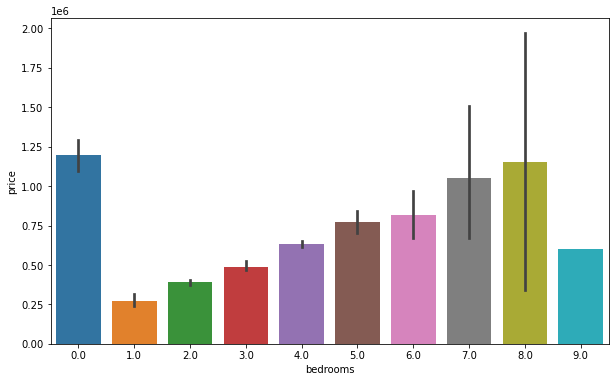

In [11]:
#get the average price for houses along their number of bedrooms:
#получить среднюю цену на дома по количеству спален: 
plt.figure(figsize=(10,6))
sns.barplot(x=houses.bedrooms, y=houses['price'])

OK something strange here. There is clearly a relationship between the number of bedrooms and the average price of a house. However, seems that a house with 9 bedrooms (!) sells for less than a house with 4 bedrooms...

Also, some houses don't have any rooms?

Let's look at this in more detail.

ОК, здесь что-то странное. Существует четкая связь между количеством спален и средней ценой дома. Однако кажется, что дом с 9 спальнями (!) Продается дешевле, чем дом с 4 спальнями ...

Кроме того, в некоторых домах нет комнат?

Давайте рассмотрим это подробнее. 

In [12]:
# get a price breakdown for each bedroom group
# получить разбивку цен по каждой группе спален 

bybedroom = houses.groupby(['bedrooms']).price.agg([len, min, max])

In [13]:
#problem #1 and #2 - 2 houses with 0 bedrooms, giant outlier at 3 bedrooms
# проблема # 1 и # 2 - 2 дома с 0 спальнями, гигантский выброс с 3 спальнями 
bybedroom

,len,min,max
bedrooms,,,
0.0,2.0,1095000.0,1295648.0
1.0,38.0,0.0,540000.0
2.0,566.0,0.0,1695000.0
3.0,2032.0,0.0,26590000.0
4.0,1531.0,0.0,4489000.0
5.0,353.0,0.0,7062500.0
6.0,61.0,0.0,3100000.0
7.0,14.0,280000.0,3200000.0
8.0,2.0,340000.0,1970000.0


The table above provides an explanation for the price discrepancy we have seen. There is only one house with 9 bedrooms! This may be a house located far from the city, or the owner might have needed to sell it in a hurry. Whatever the circumstances, 1 house is not big enough a sample. We'll need to do something if we want to use the number of bedrooms as a predictor in our model.

The table above also highlighted 2 other problems with the data.

Two houses have no bedroom!
Some houses have a price of zero
Let's look at this last problem in more detail.

Приведенная выше таблица дает объяснение наблюдаемому нами расхождению в ценах. Есть только один дом с 9 спальнями! Это может быть дом, расположенный далеко от города, или же хозяину пришлось срочно его продать. Какими бы ни были обстоятельства, 1 дом - это недостаточно большая выборка. Нам нужно будет что-то сделать, если мы хотим использовать количество спален в качестве предиктора в нашей модели.

В таблице выше также указаны 2 другие проблемы с данными.

В двух домах спальни нет!
У некоторых домов нулевая цена
Давайте рассмотрим эту последнюю проблему более подробно. 

In [14]:
# problem #3 - houses with null prices
# проблема # 3 - дома с нулевой ценой 
houses_zero= houses[houses.price==0]
print('There are '+str(len(houses_zero))+' houses without a price')

There are 49 houses without a price


Out of 4600 houses in the sample, 49 don't have a price. It's not a lot, but this might confuse the model.

We're almost done with exploring the features. Let's look at the price distribution.

Из 4600 домов в выборке 49 не имеют цены. Это немного, но это может сбить модель с толку.

Мы почти закончили изучение параметров. Посмотрим на распределение цен. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

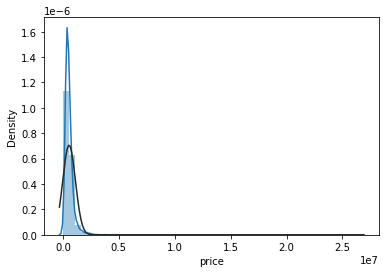

In [15]:
# problem #4 - house prices are not normal
# проблема # 4 - цены на жилье ненормальные 
sns.distplot(houses['price'], fit=norm)

The price distribution is in blue, while the normal distribution is in black. Clearly, houses prices are not normal. This is not a problem per se, rather something to keep in mind.

So, to recap, we have 3 problems :

Houses with 0 bedroom
Giant outlier at almost $27M - 50 times the price of a normal house
49 houses without a price
We'll take the easy way out - remove them from our analysis.

Ценовое распределение выделено синим цветом, а нормальное распределение - черным. Понятно, что цены на дома ненормальные. Это не проблема как таковая, это то, о чем нужно помнить.

Итак, резюмируя, у нас есть 3 проблемы:

Дома с 0 спальнями
Гигантский выброс почти за 27 миллионов долларов - в 50 раз дороже обычного дома
49 домов без цены
Мы выберем легкий выход - удалим их из нашего анализа. 

In [16]:
# new dataframe without problem #1 #2 #3
# новый фрейм данных без проблем # 1 # 2 # 3 
houses_o = houses[(houses.price<2.5*10**7) & (houses.bedrooms>0) & (houses.price>0)].copy()

Now, there is one other potential problem with our data. There are too few houses with more than 6 bedrooms. This is a problem if we want to use the number of bedrooms as a predictor of house price.

To fix this, we can simply group the houses with 7, 8 and 9 bedrooms with the houses featuring 6 bedrooms.

Теперь есть еще одна потенциальная проблема с нашими данными. Слишком мало домов с более чем 6 спальнями. Это проблема, если мы хотим использовать количество спален в качестве предиктора цены дома.

Чтобы исправить это, мы можем просто сгруппировать дома с 7, 8 и 9 спальнями с домами с 6 спальнями. 

In [17]:
#recode houses with more than 6 bedrooms as 6 bedrooms
#перекодировать дома с более чем 6 спальнями на 6 спален
houses_o['bedrooms_recoded'] = houses_o['bedrooms'].replace([7,8,9],6)

In [18]:
houses_o['renovated_0_1'] = houses_o['yr_renovated']/houses_o['yr_renovated']
houses_o['renovated_0_1'] = houses_o['renovated_0_1'].fillna(0)

In [19]:
#OK we're done with the recoding. Let's get a nice Pearson correlation matrix going on
#ОК, мы закончили перекодирование. Давайте получим красивую корреляционную матрицу Пирсона.
houses_o['renovated_0_1']

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
4595    1.0
4596    1.0
4597    0.0
4598    0.0
4599    0.0
Name: renovated_0_1, Length: 4548, dtype: float64

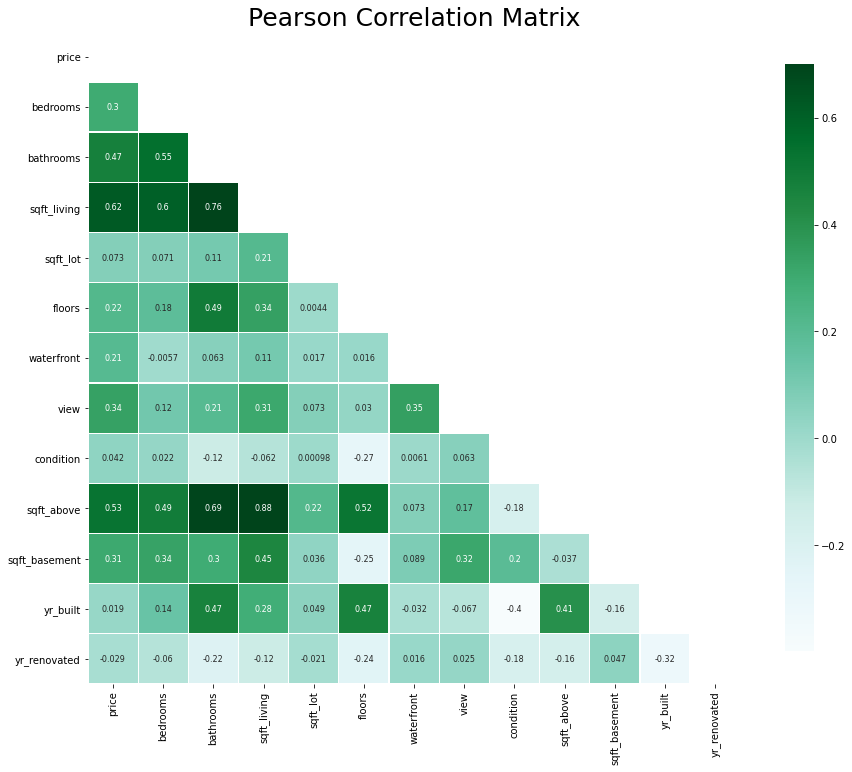

In [20]:
features = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']
mask = np.zeros_like(houses_o[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(houses_o[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

OK, this can be a bit overwhelming, so let's focus on one element at a time.

The first thing to look at is the first column. It tells us how correlated the features in the houses are to the house price. We can see that the most correlated feature is sqft_living, with a coefficent of 0.62. This makes sense - the higher the surface of the house, the higher the price.

The second most correlated feature is sqft_above, with 0.53. However, in our model we cannot use both sqft_living and sqft_above, and that's because these features are highly correlated - 0.88.

If we do use both of these features, our model won't be able to properly estimate the coefficients - it won't know whether the price is high because sqft_living is high or because sqft_above is high.

So, best practice is to select features that are highly correlated with house prices, but not correlated with each other. For now, we'll pick the following:

bedrooms_recoded
floors
view
condition
renovated_0_1
Let's go ahead and separate the price from our features:


Хорошо, это может быть немного сложно, поэтому давайте сосредоточимся на одном элементе за раз.

Первое, на что стоит обратить внимание, - это первый столбец. Это говорит нам о том, насколько характеристики домов соотносятся с ценой на них. Мы видим, что наиболее коррелированная функция - это sqft_living с коэффициентом 0,62. В этом есть смысл - чем выше площадь дома, тем выше цена.

Вторая наиболее коррелирующая функция - sqft_above с 0,53. Однако в нашей модели мы не можем использовать одновременно sqft_living и sqft_above, потому что эти функции сильно коррелированы - 0,88.

Если мы действительно воспользуемся обеими этими функциями, наша модель не сможет правильно оценить коэффициенты - она ​​не будет знать, высока ли цена из-за высокого значения sqft_living или из-за высокого значения sqft_above.

Итак, лучше всего выбирать функции, которые сильно коррелируют с ценами на жилье, но не коррелируют друг с другом. На данный момент мы выберем следующее:

спальни_запрограммированные
этажи
вид
состояние
Renovated_0_1
Давайте продолжим и отделим цену от наших функций:

In [21]:
# Move our features into the X DataFrame
# Перенести наши функции в X DataFrame
X = houses_o.loc[:,['bedrooms_recoded', 'floors','view','condition','renovated_0_1']]

# Move our labels into the y DataFrame
# Перемещаем наши метки в y DataFrame
y = houses_o.loc[:,['price']] 


In [22]:
# separate y and X into train and test
# разделяем y и X на тренировку и тест
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42
                                                   )

Finally, we use a multiple regression model on the train set to find out what is the impact of our predictor variables on price:
Наконец, мы используем модель множественной регрессии в тестовом наборе, чтобы выяснить, как наши переменные-предикторы влияют на цену:


In [23]:
#train a basic multiple regression model and print out the coefficients
# обучить базовой модели множественной регрессии и распечатать коэффициенты
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.693
Model:                            OLS   Adj. R-squared (uncentered):              0.692
Method:                 Least Squares   F-statistic:                              1433.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                        0.00
Time:                        20:35:18   Log-Likelihood:                         -45489.
No. Observations:                3183   AIC:                                  9.099e+04
Df Residuals:                    3178   BIC:                                  9.102e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

We get a nice little novel above. I know this is a lot but it's necessary.

We can see for each of our predictor variables, (bedrooms_recoded, floors, view,condition, renovated_0_1) there are several columns - coef, std err, t, P>|t|, [0.025 and 0.975]. The column we need to check first is P>|t|. It tells us what is the probability that our coefficients are equal to zero, meaning our predictor variables do not have an impact on price.

Here we're lucky - most of these probabilities are zero, except for the condition of the house and whether it has been renovated or not.

The probability that condition and renovated_0_1 are zero is 12.1% and 59.9%, respectively.

The next thing we can check is the coefficients themselves - what is the most important predictor variable? Here it seems that it's view, followed closely by floors. According to the model, if the house has a view, it will gain about $ 170k in value (1.712e+05 = 1,712*(10^5))

So this is obviously not a great model, but let's see what it does right and what it does wrong.
Выше получился милый маленький роман. Я знаю, что это много, но это необходимо.

Мы можем видеть, что для каждой из наших переменных-предикторов (спален_заполнено, этажи, вид, состояние, обновленный_0_1) есть несколько столбцов - coef, std err, t, P> | t |, [0,025 и 0,975]. Столбец, который нам нужно проверить в первую очередь, - это P> | t |. Он сообщает нам, какова вероятность того, что наши коэффициенты равны нулю, что означает, что наши переменные-предикторы не влияют на цену.

Здесь нам повезло - большинство этих вероятностей равны нулю, за исключением состояния дома и того, был ли он отремонтирован или нет.

Вероятность того, что "состояние" и "ремонт_0_1" равны нулю, составляет 12,1% и 59,9% соответственно.

Следующее, что мы можем проверить, - это сами коэффициенты - какая самая важная переменная-предиктор? Здесь кажется, что это вид, за которым следуют этажи. Согласно модели, если у дома есть вид, он получит около 170 тысяч долларов (1,712e + 05 = 1,712 * (10 ^ 5)).

Так что это явно не лучшая модель, но давайте посмотрим, что она делает правильно, а что нет.

In [24]:
# Ask the model to predict prices in the train and test set based just on our predictor variables
# Попросите модель предсказать цены в поезде и наборе тестов на основе только наших переменных-предикторов
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)

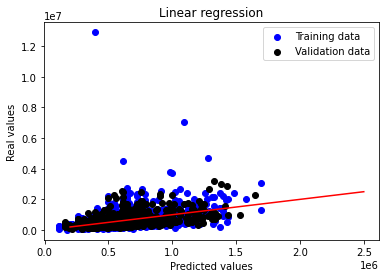

In [25]:
# Now let's plot our predicted values on one axis and the real values on the other axis
# Теперь давайте нанесем наши предсказанные значения на одну ось, а реальные значения - на другую.
plt.scatter(train_pre, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper right")
plt.plot([0.2*10**6, 0.25*10**7], [0.2*10**6, 0.25*10**7], c = "red")
plt.show()

The x-axis represents the prices predicted by the model, while the y-axis shows the true price of these houses. Ideally, we would want houses to be grouped on the red line, meaning the estimated value and the true value of a house are very close.

We are not there yet, but it isn't too bad! Our predictions follow the red line and there is no obvious train/test bias. Also, it seems that our predictions don't get worse when house prices increase, which is a good sign.

It seems our model has trouble with high-value houses though. It accurately forecasts the price of cheap and moderately priced properties, but when prices rise on the y axis, this is where we start to deviate from the ideal red line. The poster child for this prediction error is the obvious outlier sitting at 1.2x10^7 = a 12 million dollar house, where our model predicted less than $ 500 000!

Now let's compute the mean error.

Ось абсцисс представляет цены, предсказанные моделью, а ось ординат показывает истинную цену этих домов. В идеале мы хотели бы, чтобы дома были сгруппированы на красной линии, что означает, что оценочная стоимость и истинная стоимость дома очень близки.

Мы еще не там, но это не так уж плохо! Наши прогнозы следуют за красной линией, и нет очевидной предвзятости при обучении / тестировании. Кроме того, похоже, что наши прогнозы не ухудшаются с ростом цен на жилье, что является хорошим знаком.

Однако похоже, что у нашей модели есть проблемы с дорогостоящими домами. Он точно прогнозирует цены на дешевую и недорогую недвижимость, но когда цены растут по оси y, именно здесь мы начинаем отклоняться от идеальной красной линии. Образцом для этой ошибки предсказания является очевидный выброс, сидящий на уровне 1,2x10 ^ 7 = дом за 12 миллионов долларов, где наша модель предсказывала менее 500 000 долларов!

Теперь вычислим среднюю ошибку.

In [26]:
#get the results from the regression in dataframe format
# получить результаты регрессии в формате фрейма данных
res = pd.DataFrame(data=train_pre, columns=['predicted values'])
#join with the actual prices
# присоединяйтесь к актуальным ценам
res = y_train.reset_index().join(res)
#join with the training dataset
# присоединиться к обучающему набору данных
resfin = res.join(X_train, on='index',lsuffix='_y')
# compute the actual prices, predicted prices and error
# вычисляем фактические цены, прогнозируемые цены и ошибки
resfin['predprice']=res['predicted values']
resfin['actprice']=res['price']
resfin['error']=resfin['predprice']-resfin['actprice']

In [27]:
#get the results from the regression in dataframe format
# получить результаты регрессии в формате фрейма данных
res_test = pd.DataFrame(data=test_pre, columns=['predicted values'])
#join with the actual prices
# присоединяйтесь к актуальным ценам
res_test = y_test.reset_index().join(res_test)
#join with the training dataset
# присоединиться к обучающему набору данных
resfin_test = res_test.join(X_test, on='index',lsuffix='_y')
# compute the actual prices, predicted prices and error
# вычисляем фактические цены, прогнозируемые цены и ошибки
resfin_test['predprice']=resfin_test['predicted values']
resfin_test['actprice']=resfin_test['price']
resfin_test['error']=resfin_test['predprice']-resfin_test['actprice']
resdf = pd.concat([resfin,resfin_test])

In [28]:
"The mean error of our model is ${:,.0f}".format(resfin_test['error'].mean())

'The mean error of our model is $13,968'

In [29]:
#Mean error on the test set is close to $ 14k, which means that the model tends to overestimate the value of houses.
#Let's see what the shape of the errors looks like.
# Средняя ошибка на тестовом наборе близка к 14 тыс. Долларов, что означает, что модель имеет тенденцию переоценивать стоимость домов.
# Посмотрим, как выглядит форма ошибок.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='error', ylabel='Density'>

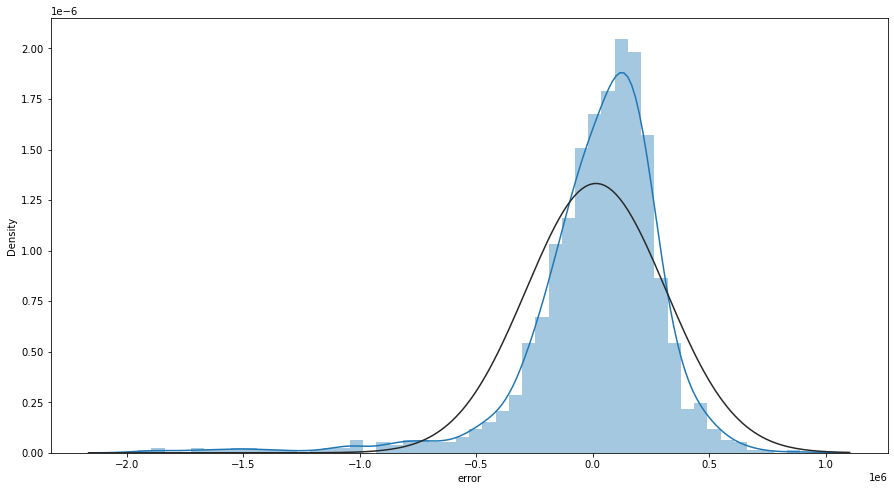

In [30]:
#plot the error
# построить ошибку
plt.figure(figsize=(15,8))
sns.distplot(resfin_test['error'], fit=norm)

In [31]:
#Next let's isolate the model's biggest mistakes to see if there is a pattern.
#Далее давайте выделим самые большие ошибки модели, чтобы увидеть, есть ли закономерность.

In [32]:
#standardize the errors
#стандартизируйте ошибки
from scipy import stats
x_array = np.array(resfin_test['error'])
normalized_X = stats.zscore(x_array)

In [33]:
#let's get the normalized error back into our dataset
#вернем нормализованную ошибку в наш набор данных
error_df = pd.DataFrame(data=normalized_X.T, columns=['normalized error'])
resfin2 = resfin_test.join(error_df)
resfin2['abs_norm_error'] = abs(resfin2['normalized error'])
#now let's select only the errors that are 2 standard deviations away from the mean
# теперь давайте выберем только те ошибки, которые находятся на 2 стандартных отклонения от среднего
resfin2['massive underestimation'] = resfin2['normalized error']<-2 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

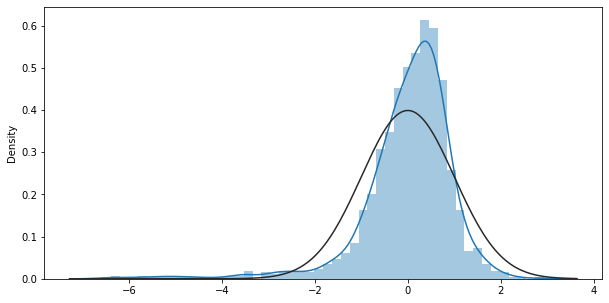

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(error_df, fit=norm)

Great! Now that we have flagged our biggest mistakes, it will be easier to find out whether there is a pattern to them.
Большой! Теперь, когда мы отметили наши самые большие ошибки, будет легче выяснить, есть ли в них закономерность.

In [35]:
#how many big mistakes in our test dataset?
#сколько серьезных ошибок в нашем тестовом наборе данных?
resfin2['massive underestimation'].value_counts()


False    1315
True       50
Name: massive underestimation, dtype: int64

In [36]:
#50 houses are underestimated in our test data! How much is that in %?
#50 домов занижены в наших тестовых данных! Сколько это в%?
#примерно 3.7% тестовых домов сильно недооценены
"approximately {:.1%} of the test houses are massively underestimated".format(resfin2['massive underestimation'].values.sum()/len(resfin2))

'approximately 3.7% of the test houses are massively underestimated'

No handles with labels found to put in legend.


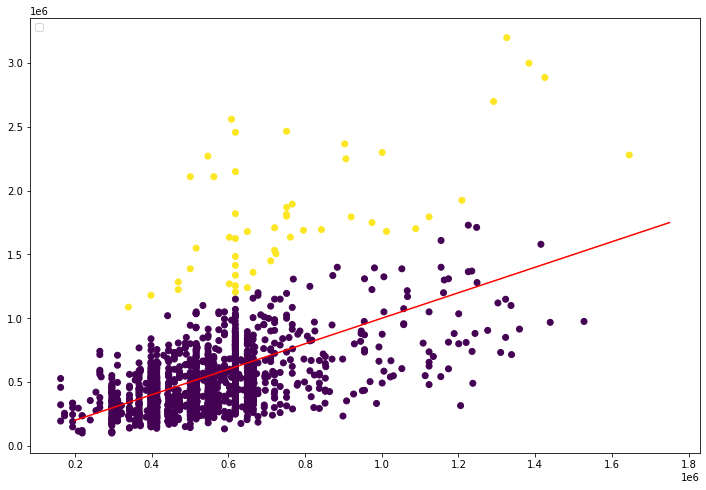

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(resfin2['predprice'], resfin2['actprice'], c = resfin2['massive underestimation'])
plt.plot([0.2*10**6, 1.75*10**6], [0.2*10**6, 1.75*10**6], c = "red")
plt.legend(loc = "upper left")

In [38]:
#Great! We've highlighted the underestimated houses in yellow.
#Большой! Жёлтым цветом выделены недооцененные дома.

In [39]:
#Now let's explore - what kind of houses is the model particularly bad at estimating the price of?
#А теперь давайте посмотрим - на какие дома модель особенно плохо оценивает цену?
pd.crosstab(resfin2['bedrooms_recoded'],resfin2['massive underestimation']).apply(lambda r: r/r.sum(), axis=1)

massive underestimation,False,True
bedrooms_recoded,,
1.0,1.000000,0.000000
2.0,0.987730,0.012270
3.0,0.988543,0.011457
4.0,0.947368,0.052632
5.0,0.870690,0.129310
6.0,0.842105,0.157895


In [ ]:
#OK so the model apparently has trouble with houses that feature 4 rooms or more. There may be something we're missing about these houses. Could be the location? After all, according to real estate agents, it's all about location!
#Итак, у модели явно проблемы с домами с 4 и более комнатами. Возможно, нам что-то не хватает в этих домах. Может быть место? В конце концов, по словам агентов по недвижимости, все дело в местоположении!


In [ ]:
#Let's visualise the price of a house and the zip code!
#Давайте визуализируем стоимость дома и почтовый индекс!

[Text(0, 0, 'WA 98039'),
 Text(1, 0, 'WA 98004'),
 Text(2, 0, 'WA 98040'),
 Text(3, 0, 'WA 98109'),
 Text(4, 0, 'WA 98112'),
 Text(5, 0, 'WA 98119'),
 Text(6, 0, 'WA 98105'),
 Text(7, 0, 'WA 98033'),
 Text(8, 0, 'WA 98006'),
 Text(9, 0, 'WA 98005'),
 Text(10, 0, 'WA 98075'),
 Text(11, 0, 'WA 98053'),
 Text(12, 0, 'WA 98077'),
 Text(13, 0, 'WA 98102'),
 Text(14, 0, 'WA 98199'),
 Text(15, 0, 'WA 98074'),
 Text(16, 0, 'WA 98052'),
 Text(17, 0, 'WA 98122'),
 Text(18, 0, 'WA 98007'),
 Text(19, 0, 'WA 98116'),
 Text(20, 0, 'WA 98177'),
 Text(21, 0, 'WA 98024'),
 Text(22, 0, 'WA 98029'),
 Text(23, 0, 'WA 98050'),
 Text(24, 0, 'WA 98027'),
 Text(25, 0, 'WA 98115'),
 Text(26, 0, 'WA 98065'),
 Text(27, 0, 'WA 98117'),
 Text(28, 0, 'WA 98103'),
 Text(29, 0, 'WA 98008'),
 Text(30, 0, 'WA 98072'),
 Text(31, 0, 'WA 98068'),
 Text(32, 0, 'WA 98107'),
 Text(33, 0, 'WA 98051'),
 Text(34, 0, 'WA 98011'),
 Text(35, 0, 'WA 98059'),
 Text(36, 0, 'WA 98034'),
 Text(37, 0, 'WA 98070'),
 Text(38, 0, 'WA 98136

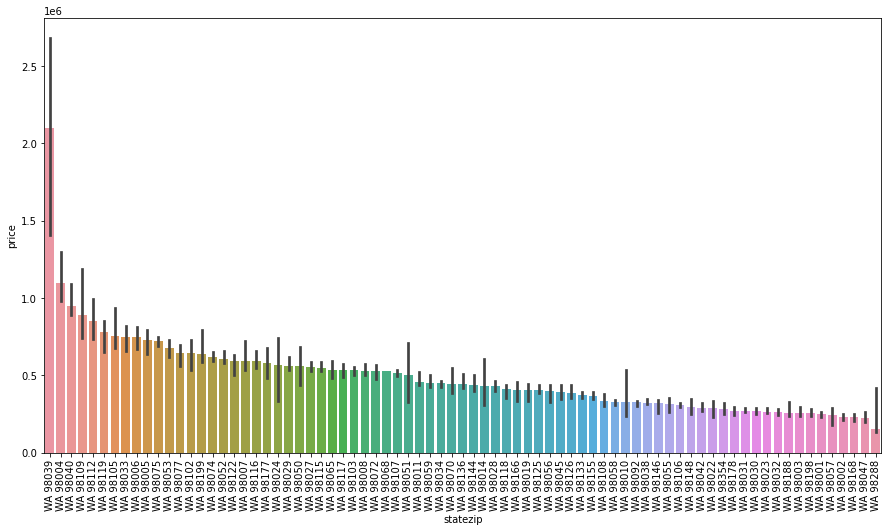

In [40]:
result = houses_o.groupby(["statezip"])['price'].aggregate(np.median).reset_index().sort_values('price', ascending=False)
plt.figure(figsize=(15,8))
chart = sns.barplot(
    x='statezip',
    y='price',
    data=houses_o,
    order = result['statezip'],
    estimator=np.median
    
    
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

We can see there are a handful of zipcodes that are way more expensive than the rest. Otherwise, statezip doesn't seem to play a huge role in the price of a house.
Let's select the 5 most expensive zips and create a new binary variable called 'posh zip':
Мы видим, что есть несколько почтовых индексов, которые намного дороже остальных. В противном случае statezip, похоже, не играет большой роли в цене дома.
Давайте выберем 5 самых дорогих индексов и создадим новую двоичную переменную posh zip:

In [41]:
houses_o['posh_zip'] = houses_o['statezip'].isin(['WA 98039','WA 98004','WA 98040','WA 98109']).astype(int)

In [43]:
# Move our features into the X DataFrame
# Перенести наши функции в X DataFrame
X = houses_o.loc[:,['bedrooms_recoded', 'floors', 'condition','view','renovated_0_1', 'posh_zip']]

# Move our labels into the y DataFrame
# Перемещаем наши метки в y DataFrame
y = houses_o.loc[:,['price']] 

In [44]:
# separate y and X into train and test
# разделяем y и X на тренировку и тест
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42
                                                   )

In [45]:
#train a basic multiple regression model and print out the coefficients
# обучить базовой модели множественной регрессии и распечатать коэффициенты
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.731
Method:                 Least Squares   F-statistic:                              1441.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                        0.00
Time:                        20:45:03   Log-Likelihood:                         -45276.
No. Observations:                3183   AIC:                                  9.056e+04
Df Residuals:                    3177   BIC:                                  9.060e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

OK, let's unpack this shall we?
What's reassuring is that condition and renovated_0_1 stay non significant, meaning they don't seem to contribute too much to the price of a house. However posh_zip does contribute and not in a small way! It is the most significant variable by a long shot AND it contributes the most to the price of a house! If you could move a house from an average neighborhood to a good neighborhood, it increases the house value by $ 700k, everything else being constant!

Хорошо, давай распакуем это, ладно?
Что обнадеживает, так это то, что состояние и ремонтируемые_0_1 остаются незначительными, то есть, похоже, они не слишком сильно влияют на стоимость дома. Однако posh_zip вносит свой вклад, и не в малой степени! Это самая важная переменная, и она больше всего влияет на цену дома! Если бы вы могли переместить дом из среднего района в хороший район, это увеличило бы стоимость дома на 700 тысяч долларов, при прочих равных условиях!

In [46]:
# Ask the model to predict prices in the train and test set based just on our predictor variables
# Попросите модель предсказать цены в поезде и наборе тестов на основе только наших переменных-предикторов 
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)

In [47]:
#get the results from the regression in dataframe format
# получить результаты регрессии в формате фрейма данных
res_test = pd.DataFrame(data=test_pre, columns=['predicted values'])
#join with the actual prices
# присоединяйтесь к актуальным ценам
res_test = y_test.reset_index().join(res_test)
#join with the training dataset
# присоединиться к обучающему набору данных
resfin_test = res_test.join(X_test, on='index',lsuffix='_y')
# compute the actual prices, predicted prices and error
# вычисляем фактические цены, прогнозируемые цены и ошибки
resfin_test['predprice']=resfin_test['predicted values']
resfin_test['actprice']=resfin_test['price']
resfin_test['error']=resfin_test['predprice']-resfin_test['actprice']
resdf = pd.concat([resfin,resfin_test])

In [48]:
#standardize the errors
# стандартизируйте ошибки
x_array = np.array(resfin_test['error'])
normalized_X = stats.zscore(x_array)

In [49]:
#let's get the normalized error back into our dataset
# вернем нормализованную ошибку в наш набор данных
error_df = pd.DataFrame(data=normalized_X.T, columns=['normalized error'])
resfin2 = resfin_test.join(error_df)
resfin2['abs_norm_error'] = abs(resfin2['normalized error'])
#now let's select only the errors that are 2 standard deviations away from the mean
#теперь давайте выберем только те ошибки, которые находятся на 2 стандартных отклонения от среднего
resfin2['massive underestimation'] = resfin2['normalized error']<-2 

No handles with labels found to put in legend.


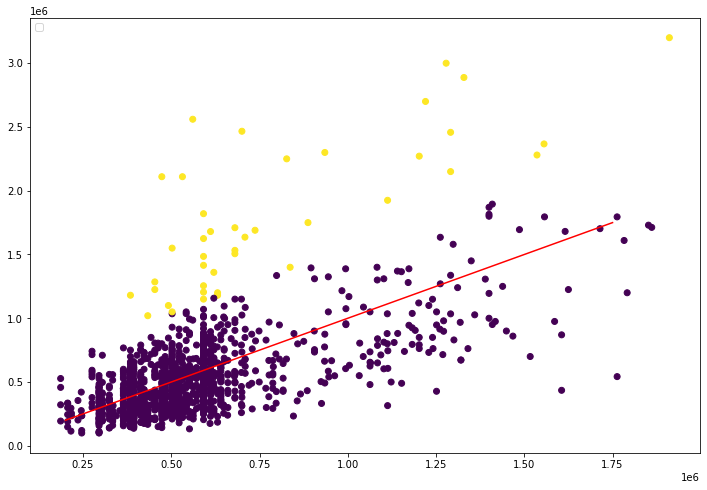

In [50]:
plt.figure(figsize=(12,8))
plt.scatter(resfin2['predprice'], resfin2['actprice'], c = resfin2['massive underestimation'])
plt.plot([0.2*10**6, 1.75*10**6], [0.2*10**6, 1.75*10**6], c = "red")
plt.legend(loc = "upper left")

Our model has one too many variables, but it could me missing something too. The Omnibus test tells us about the probability that the residuals are not normally distributed. The result of this test was zero which means they're not. If they're not normal, it means there is a pattern to the residuals that we're missing, and maybe this pattern could be explained by another variable in our dataset.
For now, let's just check the shape of our residuals:

В нашей модели слишком много переменных, но я тоже могу что-то упустить. Омнибус-тест говорит нам о вероятности того, что остатки не распределены нормально. Результат этого теста был нулевым, что означает, что это не так. Если они не нормальные, это означает, что есть образец остатков, который мы упускаем, и, возможно, этот образец можно объяснить другой переменной в нашем наборе данных.
А пока давайте просто проверим форму наших остатков:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

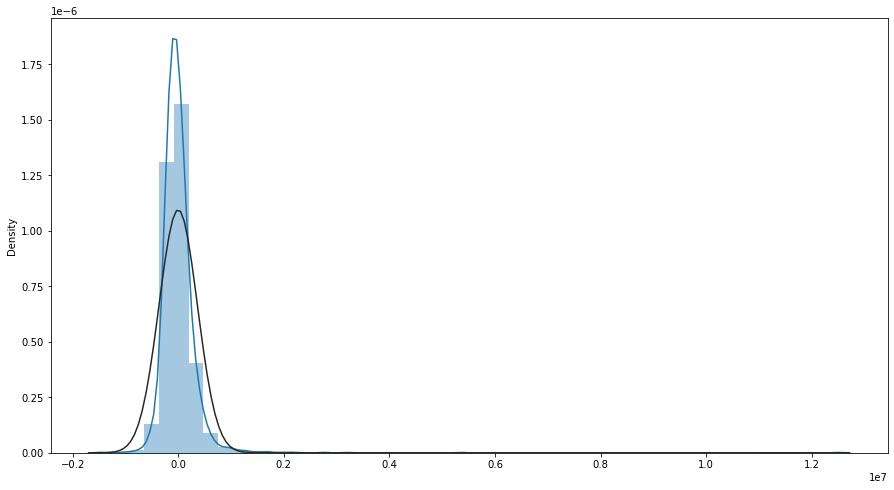

In [51]:
#plot the residuals
# построить остатки
plt.figure(figsize=(15,8))
sns.distplot(res.resid, fit=norm)

In [52]:
# Move our features into the X DataFrame
# Перенести наши функции в X DataFrame
X = houses_o.loc[:,['sqft_living','condition', 'yr_built']]

# Move our labels into the y DataFrame
# Перемещаем наши метки в y DataFrame
y = houses_o.loc[:,['price']] 

In [53]:
# separate y and X into train and test
# разделяем y и X на тренировку и тест
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42
                                                   )


In [54]:
#train a basic multiple regression model and print out the coefficients
# обучить базовой модели множественной регрессии и распечатать коэффициенты
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              3389.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                        0.00
Time:                        20:54:45   Log-Likelihood:                         -45084.
No. Observations:                3183   AIC:                                  9.017e+04
Df Residuals:                    3180   BIC:                                  9.019e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

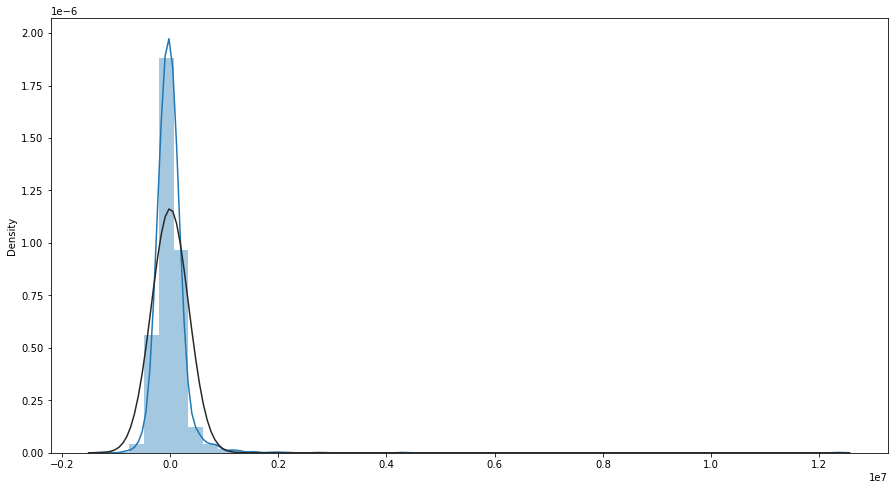

In [56]:
#plot the residuals
# построить остатки
plt.figure(figsize=(15,8))
sns.distplot(res.resid, fit=norm)

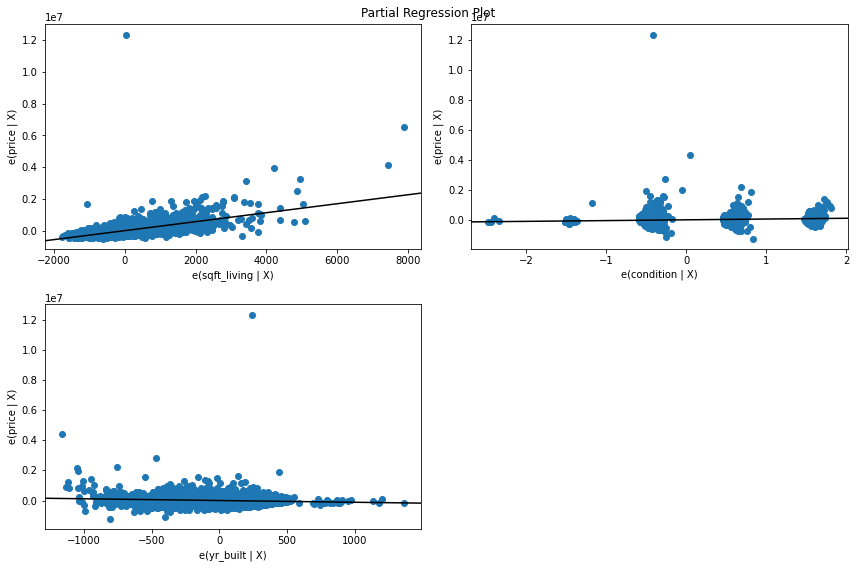

In [55]:
#partial regression plots
#графики частичной регрессии
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(res, fig=fig)